In [1]:
from model import get_model
from dataset import get_dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [3]:
model = get_model()
model.load_state_dict(torch.load("best_model_equalizeHist.pth"))
model.eval()

UNet(
  (inc): inconv(
    (conv): double_conv(
      (conv): Sequential(
        (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
  )
  (down1): down(
    (mpconv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv(
        (conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2

In [4]:
dataset = get_dataset()

In [5]:
dataloader = DataLoader(dataset, shuffle=True)

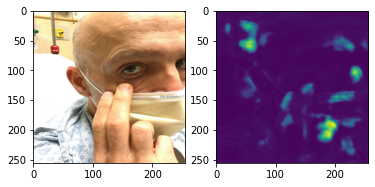

In [22]:
data, image = next(iter(dataloader))
data = data.to(device)
data = data.float()
pred = model(data)
data = data.cpu().detach().numpy()
data = np.moveaxis(data, (0,1,2,3), (0,3,1,2))
plt.subplot(1,2,1)
plt.imshow(image[0])
plt.subplot(1,2,2)
plt.imshow(pred[0][0].cpu().detach().numpy())